In [563]:
print("hello world")

hello world


In [564]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

In [565]:
df=pd.read_csv("listings.csv")

In [566]:
#df.head(10)

In [567]:
#for column in df.columns:
#    print(column)

In [568]:
df=df.dropna(subset=['latitude','longitude','bedrooms','beds','accommodates','availability_365','review_scores_rating','number_of_reviews','property_type','amenities'])
null_counts = df.isnull().sum()

# 筛选出含有 NaN 值的列名
columns_with_nan = null_counts[null_counts > 0].index.tolist()
# 对设施特征用 0 填充 NaN
#amenity_columns = [col for col in df.columns if col.startswith('amenity_')]
#df[amenity_columns] = df[amenity_columns].fillna(0)

# 对其他类型的特征用中位数或均值填充 NaN
other_columns_with_nan = ['latitude', 'longitude', 'bedrooms', 'beds', 'accommodates', 'availability_365', 'review_scores_rating', 'number_of_reviews']
df[other_columns_with_nan] = df[other_columns_with_nan].fillna(df[other_columns_with_nan].median())
print(columns_with_nan)
print(X.isnull().sum().sum())

['description', 'neighborhood_overview', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'neighbourhood', 'neighbourhood_group_cleansed', 'calendar_updated', 'has_availability', 'license']
0


In [569]:
#print(df.property_type.unique())
#print(df.amenities.unique())

In [570]:
property_dummies = pd.get_dummies(df['property_type'], prefix='type')

# 将新的独热编码的DataFrame附加回原始DataFrame
df = df[df.columns.drop(list(df.filter(regex='type_')))]

# 重新进行独热编码
property_dummies = pd.get_dummies(df['property_type'], prefix='type')

# 将新的独热编码的DataFrame附加回原始DataFrame
df = pd.concat([df, property_dummies], axis=1)

# 打印新的列名，验证是否正确添加
#print([col for col in df.columns if col.startswith('type_')])
#print(df.iloc[:, -20:])

In [571]:
import ast

# 尝试解析字符串形式的列表，如果失败则返回空列表
def parse_list(x):
    try:
        return ast.literal_eval(x)
    except:
        return []

# 应用解析函数到每一行的 amenities 列
df['amenities'] = df['amenities'].apply(parse_list)


In [572]:
from sklearn.preprocessing import MultiLabelBinarizer
# 删除所有可能已存在的以 'amenity_' 开头的列（如果之前使用的是不同的前缀，请相应调整）
df = df[df.columns.drop(list(df.filter(regex='amenity_')))]

# 初始化 MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# 对设施列表进行独热编码
amenities_encoded = mlb.fit_transform(df['amenities'])
amenities_df = pd.DataFrame(amenities_encoded, columns=["amenity_" + cls for cls in mlb.classes_])

# 将编码后的DataFrame附加回原始DataFrame
#df = pd.concat([df, amenities_df], axis=1)
# 可以选择删除原始的 amenities 列
#df.drop('amenities', axis=1, inplace=True)


In [573]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 定义原始特征集X和目标变量y
X = df[['latitude', 'longitude', 'bedrooms', 'beds', 'accommodates', 'availability_365', 'review_scores_rating', 'number_of_reviews']]
y = df['price']
y = y.str.replace('$', '', regex=False)  # 移除美元符号
y = y.astype(float)  # 转换为浮点数】

# 添加独热编码列到X
type_columns = [col for col in df.columns if col.startswith('type_')]
X = pd.concat([X, df[type_columns]], axis=1)
X = pd.concat([X, df[amenities_df]], axis=1)


In [574]:
# 分割数据为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 打印训练集中的y以验证
#print(y_train)
#print(X)

In [575]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X.isnull().sum().sum())

30550


/Users/ziqi/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/ziqi/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/ziqi/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [560]:
df=df.dropna(subset=['latitude','longitude','bedrooms','beds','accommodates','availability_365','review_scores_rating','number_of_reviews','property_type'])
#print(df)
#print(X.isnull().sum().sum())

In [561]:
svr_model = SVR(kernel='poly', C=100.0, epsilon=0.1)

# 在标准化后的训练数据上训练SVR模型
svr_model.fit(X_train_scaled, y_train)

# 使用训练好的模型对标准化后的测试数据进行预测
y_pred = svr_model.predict(X_test_scaled)

# 计算并打印模型的性能指标
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1078.0150535203356
R-squared: 0.6221272513649027


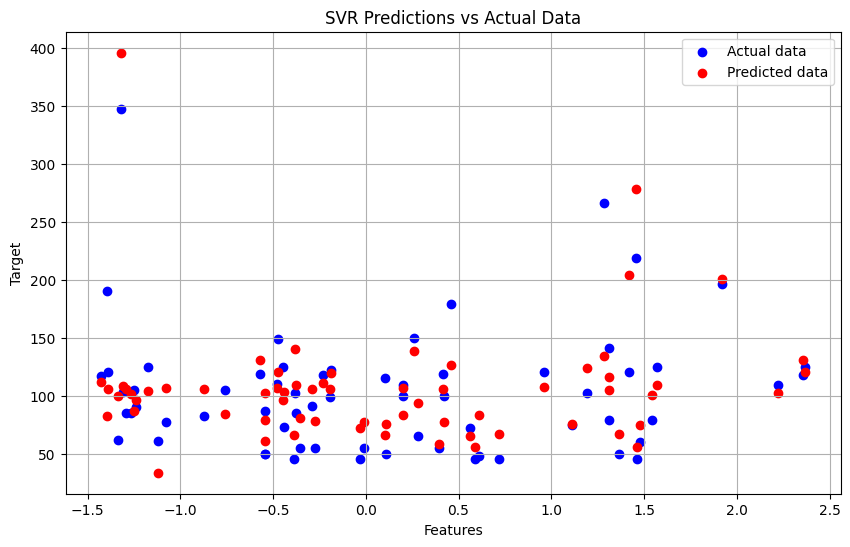

In [562]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled[:, 0], y_test, color='blue', label='Actual data')
plt.scatter(X_test_scaled[:, 0], y_pred, color='red', label='Predicted data')
plt.title('SVR Predictions vs Actual Data')
plt.xlabel('Features')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()

In [544]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)
print("Explained Variance Score:", explained_variance)


MSE: 1508.3701865077642
RMSE: 38.83774177919932
MAE: 29.19243413484663
R-squared: 0.4712764107758619
Explained Variance Score: 0.49987317666258757
